![Kmeans funny pic](https://miro.medium.com/v2/resize:fit:1133/1*uBvTgdXyIqXNsClJ-voqaw.png)

# Understanding K-Means Clustering

K-Means Clustering is an unsupervised machine learning algorithm used to group data points into clusters. It is widely used in customer segmentation, image compression, and pattern recognition. In this notebook, we will cover:
- The concept and intuition behind K-Means
- The mathematical foundation
- Implementation using `sklearn.datasets`
- Interpretation of results


## Intuition Behind K-Means Clustering

Imagine you are organizing a party and need to seat people based on their interests. If you don’t have prior knowledge of their preferences, you can let them naturally form small groups. K-Means works similarly—it groups data points based on similarity, forming `k` clusters.

### How Does K-Means Work?
1. Choose `k` clusters (decided by the user).
2. Randomly initialize `k` centroids (points representing the center of each cluster).
3. Assign each data point to the nearest centroid.
4. Compute the new centroids by averaging the assigned points.
5. Repeat steps 3 and 4 until the centroids stop changing.

This iterative process ensures that similar data points belong to the same group.


## Mathematical Foundation

### Distance Measurement (Euclidean Distance)
K-Means uses Euclidean Distance to measure similarity between points.

$$ d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

where $$ (x_1, y_1) $$ and $$ (x_2, y_2) $$ are two points in a 2D space.

### Objective Function (Minimizing Inertia)
K-Means minimizes the sum of squared distances (called inertia) from each point to its cluster center:

$$ J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 $$

where:  
- $k$ is the number of clusters,  
- $C_i$ represents cluster $i$,  
- $\mu_i$ is the centroid of cluster $i$.


This ensures that the data points are tightly packed around the centroids.



## Importing Required Libraries

We use `sklearn` for datasets and K-Means, along with `matplotlib` for visualization.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


## Generating Sample Data

We use `make_blobs` to create synthetic data with 3 clusters.


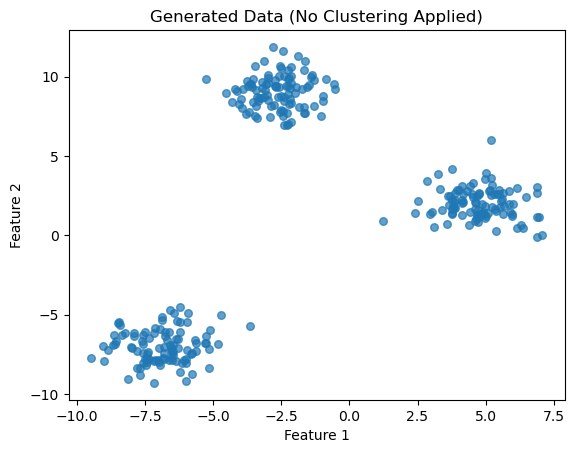

In [2]:
# Create synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.05, random_state=42)

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.7)
plt.title("Generated Data (No Clustering Applied)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Applying K-Means Algorithm

We apply K-Means with `k=3` to our dataset.


c:\Users\Asus\Importantsoftware\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\Importantsoftware\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


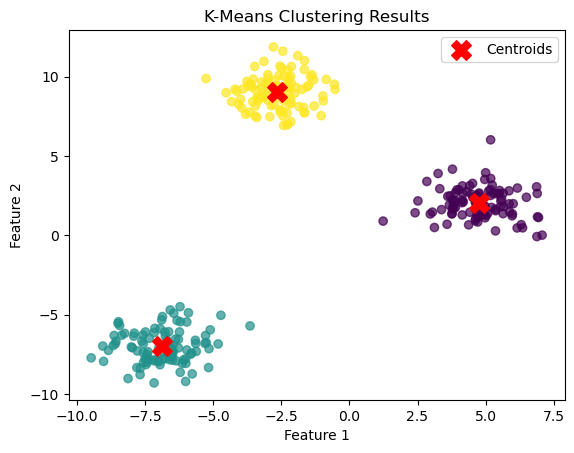

In [3]:
# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Getting cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizing clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Interpreting Results

- The points are grouped into 3 clusters based on similarity.
- The red `X` marks the centroids (center of each cluster).
- Similar points are closer to the same centroid.
- If we re-run K-Means, the centroid initialization may change, slightly altering results.

### Key Takeaways:
1. **Choosing `k` is crucial:** If `k` is too small, we might under-cluster; if it's too large, we might over-cluster.
2. **K-Means assumes spherical clusters:** If the actual data distribution is different, K-Means might not be the best choice.
3. **Sensitive to initialization:** K-Means may give different results based on initial centroids.


## Choosing the Optimal Number of Clusters

The **Elbow Method** helps determine the best `k`. It plots inertia (sum of squared distances) for different `k` values.

If inertia decreases rapidly at a certain `k`, that point is the 'elbow', indicating the ideal number of clusters.


c:\Users\Asus\Importantsoftware\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\Importantsoftware\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Asus\Importantsoftware\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\Importantsoftware\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

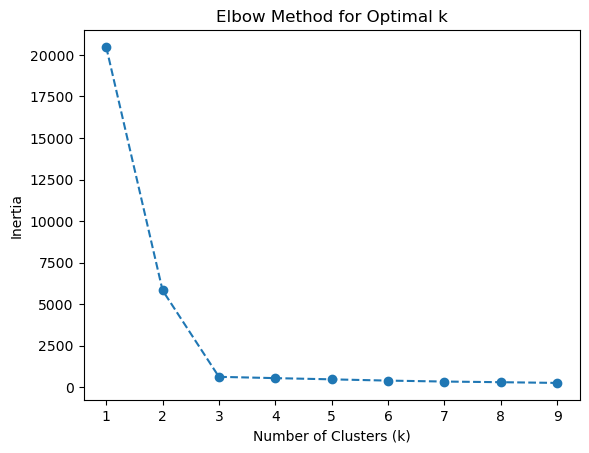

In [4]:
# Finding the optimal k using Elbow Method
inertia = []
k_values = range(1, 10)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

# Plotting the Elbow Curve
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


## Interpreting the Elbow Method Plot

The Elbow Method helps determine the optimal number of clusters (`k`) by plotting the inertia (sum of squared distances from each point to its assigned cluster center) against different values of `k`. 

### Key Observations:
- The inertia decreases as `k` increases because adding more clusters reduces the within-cluster variance.
- The **"elbow point"** is where the rate of decrease sharply slows down, forming an "L" shape. This is the point where adding more clusters provides **diminishing returns** in reducing inertia.

### Interpreting the Graph:
- In this plot, the **elbow occurs at `k = 3`**, suggesting that **3 clusters** is the optimal choice.
- Beyond `k = 3`, the decrease in inertia is minimal, meaning additional clusters do not significantly improve clustering performance.

### Conclusion:
Based on the Elbow Method, we should choose **`k = 3`**, as it balances clustering accuracy and computational efficiency.


![KMEAns useful](https://i.pinimg.com/736x/fe/72/b9/fe72b953bb0a69af5d2eeba1439dfba3--funny-photos-memes.jpg)


## Deep Math (Optional) - Understanding WCSS in K-Means

### What is WCSS?
Within-Cluster Sum of Squares (**WCSS**) or as refferred to it here as inertia, is the metric that K-Means optimizes to form compact clusters. It measures the total squared distance between each data point and its assigned cluster centroid. The goal of K-Means is to **minimize WCSS**, ensuring that points within the same cluster are as close as possible.

Mathematically, WCSS is defined as:

$WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$

where:  
- $k$ is the number of clusters,  
- $C_i$ represents the set of data points in cluster $i$,  
- $\mu_i$ is the centroid of cluster $i$,  
- $||x - \mu_i||^2$ is the squared Euclidean distance between a point $x$ and its cluster centroid $\mu_i$.

### Why Does WCSS Matter?
- A **lower WCSS** means clusters are **compact** and well-separated.
- A **higher WCSS** suggests that points are spread out, indicating poor clustering.
- **K-Means aims to minimize WCSS** by iteratively adjusting centroids.

---

### Step-by-Step Example:

#### Suppose we have the following 2D data points:
| Point | \( x_1 \) | \( x_2 \) |
|--------|--------|--------|
| A | 2 | 3 |
| B | 3 | 4 |
| C | 8 | 7 |
| D | 9 | 6 |

Now, assume K-Means clusters them into **two clusters** with centroids:

$\mu_1 = (2.5, 3.5), \quad \mu_2 = (8.5, 6.5)$


We compute the WCSS for each cluster:

#### **For Cluster 1 (Points A & B, Centroid \( \mu_1 \))**:
$ \text{WCSS}_1 = (2 - 2.5)^2 + (3 - 3.5)^2 + (3 - 2.5)^2 + (4 - 3.5)^2 = 0.25 + 0.25 + 0.25 + 0.25 = 1.0 $

#### **For Cluster 2 (Points C & D, Centroid \( \mu_2 \))**:
$ \text{WCSS}_2 = (8 - 8.5)^2 + (7 - 6.5)^2 + (9 - 8.5)^2 + (6 - 6.5)^2 = 0.25 + 0.25 + 0.25 + 0.25 = 1.0 $  

#### **Total WCSS**:  
$ WCSS = WCSS_1 + WCSS_2 = 1.0 + 1.0 = 2.0 $


---

### **How Do We Use WCSS in the Elbow Method?**
The Elbow Method plots WCSS against different values of \( k \) (number of clusters). As \( k \) increases, WCSS decreases, but after a certain point, the **improvement becomes marginal**. 

- **At lower \( k \), WCSS is high** because clusters are too broad.
- **At very high \( k \), WCSS is low**, but clusters may be too specific (overfitting noise).
- The **optimal \( k \) is the "elbow point"**—where the reduction in WCSS starts slowing down.

---

### **Analogy: Assigning Students to Study Groups**
Imagine a teacher is forming study groups based on student similarities:

1. **One Big Group (\( k=1 \))**: WCSS is very high because all students are in one large, diverse group.
2. **Some Logical Groups (\( k=3 \))**: WCSS drops significantly as students are grouped by similar subjects.
3. **Too Many Groups (\( k=10 \))**: WCSS is very low, but students are split too specifically, leading to redundancy.

Thus, choosing the **right number of clusters (groups) balances simplicity and effectiveness**.

---

### **Summary**
- **WCSS is the metric K-Means minimizes to form compact clusters.**
- **Lower WCSS means better clustering, but too low could indicate overfitting.**
- **The Elbow Method helps choose the optimal number of clusters by observing where WCSS reduction slows down.**
- **An analogy with study groups helps us understand how balancing clusters is essential.**


Thanks and Happy coding